## Train RBM example
The below code was adapted and extended based on [code by mr-easy on github](https://github.com/mr-easy/Restricted-Boltzmann-Machine).

The below code is distributed by Kishkash555 under MIT License.


In [48]:
import sys
sys.path.append('Restricted-Boltzmann-Machine/')
import RBM
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from time import time
from math import ceil

In [49]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(60000,-1)/255

In [50]:
train_x.shape, train_y.shape

((60000, 784), (60000,))

In [6]:

train_x.dtype, train_x.min(), train_x.max()

(dtype('uint8'), 0, 255)

3

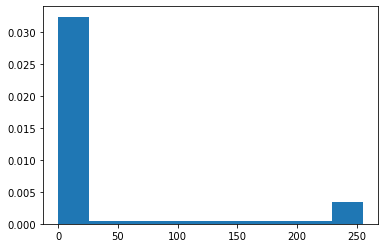

In [13]:
ret= plt.hist(train_x.reshape(-1),density=True)
len(ret)

In [19]:
ret[0]*25.5

array([0.82584734, 0.01215731, 0.01093021, 0.00931184, 0.00949498,
       0.01069758, 0.00998314, 0.01102727, 0.01300723, 0.08754309])

In [15]:
ret[1]

array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ])

In [16]:
ret[2]

<BarContainer object of 10 artists>

In [18]:
ret[0].sum()*255

10.0

In [20]:
from collections import Counter

In [28]:
_, cnts = np.unique(train_x.reshape(-1),return_counts=True)

In [33]:
("{:,} "*2).format(cnts[0], cnts[100:].sum())

'38,045,844 6,697,502 '

## Create and train an RBM
- number of visible nodes: 728 (size of image)
- number of hidden nodes: 64

In [34]:
rbm = RBM.RBM(n_vis=784, n_hid = 64)


In [51]:


def get_batches(data, batch_size, shuffle=False):
    '''
    Function to provide data in batches.
    input:
        - data: The data to be batched, each sample in one row.
        - batch_size: Size of one batch (last batch might be smaller)
        - shuffle: True if data should be shuffled.
    '''
    if(shuffle):
        np.random.shuffle(data)
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]



In [52]:
# Some parameters to set
batch_size = 100
num_epochs = 20
lr = 0.1
burn_in = 0
num_steps = 1


# Our RBM object
rbm = RBM.RBM(n_vis=28*28, n_hid=100)


# Training loop
errors = []
free_energies_val = []
free_energies_train = []
start_time = time()

# plot_images(rbm, selected_imgs, 
#             title="Reconstructed Images    Epoch: 0",
#             save_as="recon_" + str(0))

for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(train_x, batch_size, shuffle=True):
        iteration += 1
   
        # Compute gradients and errors
        error += rbm.compute_error_and_grads(batch, burn_in=burn_in, num_steps=num_steps)
        
        # Update parameters - use momentum as explained in Hinton's guide
        
        if(epoch > 5):
            rbm.update_params(lr, momentum=0.5)
        else:
            rbm.update_params(lr, momentum=0.9)
        
    #plot_images(rbm, selected_imgs, 
    #        title="Reconstructed Images    Epoch: {}".format(epoch),
    #        save_as="recon_" + str(epoch))
        
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, time()-start_time))
    errors.append(error)



epoch:1 	 error:19868.9259 	 training time:8.95 s
epoch:2 	 error:10262.9437 	 training time:17.88 s
epoch:3 	 error:9178.6723 	 training time:26.89 s
epoch:4 	 error:8635.1414 	 training time:35.66 s
epoch:5 	 error:8292.5392 	 training time:44.66 s
epoch:6 	 error:8052.0513 	 training time:54.60 s
epoch:7 	 error:7869.3452 	 training time:63.66 s
epoch:8 	 error:7734.6732 	 training time:72.51 s
epoch:9 	 error:7628.5861 	 training time:80.92 s
epoch:10 	 error:7533.6333 	 training time:89.71 s
epoch:11 	 error:7458.6252 	 training time:99.38 s
epoch:12 	 error:7395.9005 	 training time:110.32 s
epoch:13 	 error:7333.8522 	 training time:122.63 s
epoch:14 	 error:7283.0956 	 training time:134.39 s
epoch:15 	 error:7234.6693 	 training time:146.07 s
epoch:16 	 error:7189.7373 	 training time:156.42 s
epoch:17 	 error:7147.1981 	 training time:165.68 s
epoch:18 	 error:7112.0139 	 training time:175.03 s
epoch:19 	 error:7079.9684 	 training time:184.60 s
epoch:20 	 error:7045.3470 	 tr

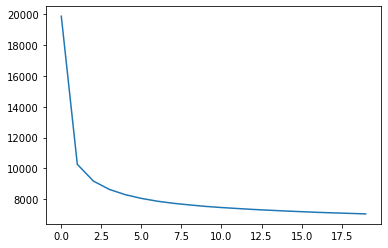

In [53]:
plt.plot(errors)

In [54]:


def plot_weights(rbm, title='weights', save_as="weights"):
    '''
    Plot the weight parameter of the RBM, one for each hidden unit.
    '''
    plt.clf()
    fig, axes = plt.subplots(10, 10, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(8, 8))
    fig.suptitle(title)
    for i in range(10):
        for j in range(10):
            axes[i, j].imshow(rbm.W[:,i*10+j].reshape(28, 28), cmap='gray')
            axes[i, j].axis('off')

    plt.savefig(save_as)
    plt.show()
    plt.close()



## Visualize 100 features
The hand-written digits do not display intricate patterns. some patches in the image below look like elaborately curled pretzels (top right corner, and the adjacent one on the left, for instance). I believe these are indications of overfitting -  random patterns which were not sufficiently un-learned in the training process

<Figure size 432x288 with 0 Axes>

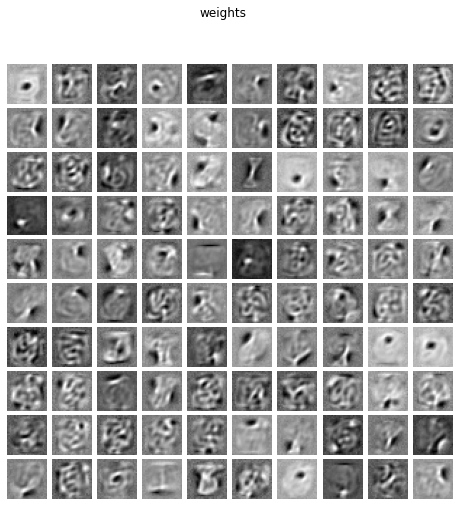

In [55]:
plot_weights(rbm)

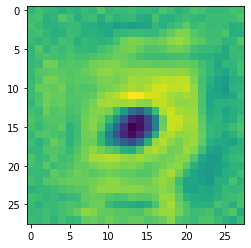

In [57]:
plt.imshow(rbm.W[:,0].reshape(28, 28))

In [68]:
print(np.array2string(10*rbm.W[:,0].reshape(28, 28),precision=0, suppress_small=True,max_line_width=150,separator=''))

[[ -3. -2. -3. -3. -4. -3. -4. -2. -3. -1. -3. -2. -3. -2. -3. -3. -3. -1. -2. -4. -3. -1. -2. -3. -3. -3. -1. -2.]
 [ -2. -1. -4. -3. -1. -2. -4. -3. -2. -4. -2. -4. -3. -3. -4. -5. -2. -4. -4. -3. -2. -3. -3. -2. -2. -2. -2. -1.]
 [ -1. -2. -4. -4. -3. -3. -3. -4. -4. -5. -5. -7. -5. -6. -6. -5. -3. -4. -2. -2.  0. -2. -1. -3. -2. -3. -4. -4.]
 [ -2. -2. -3. -4. -4. -2. -3. -4. -4. -4. -5. -3. -3. -2. -2. -3. -3. -1.  0.  2.  2. -0. -1. -2. -2. -1. -4. -4.]
 [ -3. -3. -2. -3. -2. -2. -4. -3. -3. -4. -3. -1.  1.  2.  2.  1.  1.  1.  3.  3.  2.  0. -0. -2. -2. -3. -3. -1.]
 [ -3. -1. -3. -2. -2. -2. -3. -3. -3. -2. -1.  0.  1.  1.  0. -1. -1. -0.  1.  1.  0. -2. -3. -3. -3. -5. -3. -3.]
 [ -3. -2. -1. -2. -2. -1. -2. -2. -1. -0. -0.  1.  1. -0. -1. -2. -2. -2. -2. -2. -2. -3. -4. -4. -5. -5. -3. -2.]
 [ -3. -2.  1.  1. -1. -1. -1. -0.  1.  2.  2.  2.  1.  0.  0.  0. -0.  0.  0.  1.  0. -0. -2. -3. -5. -3. -3. -2.]
 [ -2. -1. -0.  0. -0. -1. -0.  0.  1.  3.  3.  2.  2.  3.  3.  3.  3.  

In [64]:
100*rbm.W[:,0].min(), 100*rbm.W[:,0].max()

(-255.8745585103917, 85.04732334228885)

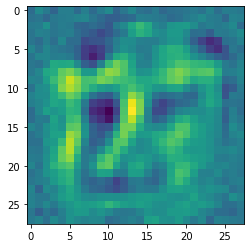

In [69]:
plt.imshow(rbm.W[:,1].reshape(28, 28))

In [71]:
print(np.array2string(10*rbm.W[:,1].reshape(28, 28),precision=0, suppress_small=True,max_line_width=150,separator=''))

[[ -3. -0. -2. -4. -2. -2. -3. -2. -3. -2. -0. -4. -2. -1. -3. -3. -2. -4. -3. -3. -2. -2. -3. -1. -3. -2. -2. -2.]
 [ -3. -2. -4. -2. -2. -2. -1. -1. -2. -3. -5. -4. -4. -4. -1. -2. -2. -2. -3. -3. -2. -1. -1. -2. -2. -4. -1. -1.]
 [ -2. -2.  0. -2. -2. -2. -4. -4. -3. -4. -5. -2. -1.  2.  5.  3. -1. -1.  1.  1.  1. -0. -2. -1. -2. -2. -0. -3.]
 [ -3. -1. -2. -2. -2. -2. -3. -4. -5. -7. -5. -3. -2.  2.  4.  3.  0. -0.  1.  1. -0. -3. -3. -5. -2. -2. -1. -0.]
 [ -2. -3. -2. -3. -1. -3. -3. -6. -6. -5. -4. -2. -0. -0. -1. -2. -2. -0.  1.  1. -1. -4. -7. -9. -8. -3. -2. -1.]
 [ -1. -3. -1. -2. -3. -3. -4. -7. -8. -7. -4. -1.  0. -0. -2. -2.  0.  2.  4.  3.  2. -2. -4. -7. -9. -6. -2. -3.]
 [ -2. -1. -1. -2. -1. -2. -4. -8.-10. -8. -2.  3.  4.  2. -1. -2.  0.  2.  3.  4.  3.  0. -1. -3. -4. -5. -4. -2.]
 [ -2. -3. -1.  3.  3.  3. -0. -5. -6. -1.  4.  7.  6.  2. -1. -1.  1.  2.  4.  5.  5.  4.  4.  4.  1. -2. -3. -1.]
 [ -2. -1.  3.  3.  6.  7.  6.  1.  1.  6.  8.  8.  6.  3.  0.  1.  2.  